In [1]:
import os
import numpy as np
import pandas as pd
import json
import pprint
import glob
import datetime
import random
import re
import warnings
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

warnings.filterwarnings('ignore')


2024-05-01 18:29:06.683744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Decided to exclude latitude and longitude bc they won't really tell us much in terms of conclusions since others had run into the issue of how latitude and longitude expained most of variation which isn't that accurate in terms of an insight or business value conclusion form the experiment. 


# Importing Data:

In [4]:
# 1975 to 1981:

acc_vehc_sect_1 = pd.read_csv('acc_vehc_sect_1.csv')
acc_vehc_sect_1.head()

,YEAR,ST_CASE,PERSONS,HOUR,SCH_BUS,HIT_RUN,MOD_YEAR,DEATHS,DR_DRINK
0,1975,10001,4,20,0.0,0,1973.0,0.0,0.0
1,1975,10001,4,20,0.0,0,1969.0,0.0,0.0
2,1975,10001,4,20,0.0,0,1969.0,1.0,0.0
3,1975,10002,1,19,0.0,0,1971.0,1.0,0.0
4,1975,10003,2,22,0.0,0,1972.0,1.0,0.0


In [5]:
acc_vehc_sect_1.shape

(15770, 9)

In [6]:
acc_vehc_sect_1.dtypes

YEAR          int64
ST_CASE       int64
PERSONS       int64
HOUR          int64
SCH_BUS     float64
HIT_RUN       int64
MOD_YEAR    float64
DEATHS      float64
DR_DRINK    float64
dtype: object

#### Converting the number of deaths version into a categorical variable where all death values 3 and above are placed into a single category

In [9]:
X_1 = acc_vehc_sect_1.loc[:, ~(acc_vehc_sect_1.columns.isin(['DEATHS', 'ROAD_NAME', 'ST_CASE']))]

y_1 = acc_vehc_sect_1.loc[:,'DEATHS']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.25)

In [10]:
# 1982 to 1990:

acc_vehc_sect_2 = pd.read_csv('acc_vehc_sect_2.csv')

acc_vehc_sect_2.head()

,YEAR,ST_CASE,PERSONS,HOUR,ROAD_NAME,MILE_MARKER,SCH_BUS,HIT_RUN,MOD_YEAR,DEATHS,DR_DRINK
0,1982,10001,2,19,130,78.0,0,0,1972.0,2,0
1,1982,10002,2,23,285S,38944.0,0,0,1969.0,1,0
2,1982,10003,1,12,285N,38944.0,0,0,1970.0,1,1
3,1982,10004,1,1,15,36.0,0,0,1980.0,2,1
4,1982,10005,2,15,285W,38944.0,0,2,1966.0,0,1


In [12]:
# Exclude the response variable & categorical variables with too many levels:

X_2 = acc_vehc_sect_2.loc[:, ~(acc_vehc_sect_2.columns.isin(['DEATHS', 'ROAD_NAME', 'ST_CASE']))]

y_2 = acc_vehc_sect_2.loc[:,'DEATHS']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.25)

In [13]:
# 1991 to 2000:

acc_vehc_sect_3 = pd.read_csv('acc_vehc_sect_3.csv')

acc_vehc_sect_3.head()

,YEAR,ST_CASE,NUM_PEDS,PERSONS,HOUR,ROAD_NAME,MILE_MARKER,SCH_BUS,HIT_RUN,MOD_YEAR,DEATHS,DR_DRINK
0,1991,10001,0,4,2,I75,3173.0,0,0,1989.0,1,0
1,1991,10002,0,1,8,307,87.0,0,0,1976.0,0,0
2,1991,10002,0,1,8,307,87.0,0,0,1985.0,0,0
3,1991,10002,0,1,8,307,87.0,0,0,1989.0,1,0
4,1991,10002,0,1,8,307,87.0,0,0,1987.0,1,0


In [15]:
X_3 = acc_vehc_sect_3.loc[:, ~(acc_vehc_sect_3.columns.isin(['DEATHS', 'ROAD_NAME', 'ST_CASE']))]

y_3 = acc_vehc_sect_3.loc[:,'DEATHS']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.25)

In [16]:
# 2001 to 2007:

acc_vehc_sect_4 = pd.read_csv('acc_vehc_sect_4.csv')

acc_vehc_sect_4.head()

,YEAR,ST_CASE,NUM_PEDS,PERSONS,HOUR,ROAD_NAME,MILE_MARKER,SCH_BUS,DEATHS,MOD_YEAR,DR_DRINK,HIT_RUN
0,2001,10001,0,2,21,I-75 (SR 401),124.0,0,1,1997.0,1,0
1,2001,10002,0,4,10,I-75 (SR 401),12.0,0,1,1994.0,0,0
2,2001,10003,0,2,14,US-25 (SR 23),106.0,0,1,1992.0,0,0
3,2001,10004,0,2,1,237,30.0,0,1,1987.0,1,0
4,2001,10004,0,2,1,237,30.0,0,0,1989.0,0,0


In [18]:
X_4 = acc_vehc_sect_4.loc[:, ~(acc_vehc_sect_4.columns.isin(['DEATHS', 'ROAD_NAME', 'ST_CASE']))]

y_4 = acc_vehc_sect_4.loc[:,'DEATHS']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.25)

In [19]:
# 2008 to 2014:

acc_vehc_sect_5 = pd.read_csv('acc_vehc_sect_5.csv')

acc_vehc_sect_5.head()

,YEAR,ST_CASE,NUM_PEDS,NUM_VEHC,PERSONS,HOUR,ROAD_NAME,MILE_MARKER,LATITUDE,LONGITUD,SCH_BUS,DEATHS,MOD_YEAR,DR_DRINK,HIT_RUN
0,2008,10001,0,1,1,18,SR-253,158.0,30.963258,-84.568056,0,0,2006.0,0,0
1,2008,10002,0,2,5,17,SR-14 AL,105.0,33.604111,-84.538122,0,1,2003.0,0,0
2,2008,10002,0,2,5,17,SR-14 AL,105.0,33.604111,-84.538122,0,0,2000.0,0,0
3,2008,10003,0,2,3,13,SR-120,32.0,33.767589,-85.242619,0,1,2001.0,1,0
4,2008,10004,0,1,1,1,SR-104,68.0,33.557275,-82.160483,0,1,1993.0,0,0


In [21]:
X_5 = acc_vehc_sect_5.loc[:, ~(acc_vehc_sect_5.columns.isin(['DEATHS','ROAD_NAME', 
                                                             'LATITUDE', 'LONGITUD', 'ST_CASE']))]

y_5 = acc_vehc_sect_5.loc[:,'DEATHS']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size = 0.25)

In [22]:
# 2015 to 2022:

acc_vehc_sect_6 = pd.read_csv('acc_vehc_sect_6.csv')

acc_vehc_sect_6.head()

,YEAR,ST_CASE,STATENAME,NUM_PEDS,NUM_VEHC,PERSONS,MONTHNAME,DAYNAME,DAY_WEEKNAME,HOUR,...,WRK_ZONENAME,LGT_CONDNAME,WEATHERNAME,SCH_BUS,HIT_RUN,MOD_YEAR,DEATHS,DR_DRINK,COUNTYNAME,CITYNAME
0,2015,10001,Georgia,1,1,2,November,9,Monday,19,...,NaN,Dark - Not Lighted,Rain,0,0,2003.0,1,1,NOT AVAILABLE,NOT AVAILABLE
1,2015,10002,Georgia,0,1,1,November,10,Tuesday,23,...,NaN,Dark - Not Lighted,Clear,0,0,2006.0,1,0,NOT AVAILABLE,NOT AVAILABLE
2,2015,10003,Georgia,1,2,5,November,10,Tuesday,21,...,NaN,Dark - Not Lighted,Cloudy,0,0,2008.0,1,1,NOT AVAILABLE,NOT AVAILABLE
3,2015,10004,Georgia,0,2,6,November,11,Wednesday,15,...,NaN,Daylight,Clear,0,0,2005.0,1,1,NOT AVAILABLE,NOT AVAILABLE
4,2015,10005,Georgia,1,1,1,November,11,Wednesday,19,...,NaN,Dark - Not Lighted,Clear,0,0,2006.0,1,0,NOT AVAILABLE,NOT AVAILABLE


#### Generate dummy variables for Time Period 6:

Will make these variables with fewer levels into dummy variables:

MONTHNAME

DAY_WEEKNAME

ROUTENAME

RUR_URBNAME

FUNC_SYSNAME

COLLISION_TYPE

TYP_INTNAME

REL_ROADNAME

WRK_ZONENAME

LGT_CONDNAME

WEATHERNAME

Will exclude these variables because of too many levels:

STATENAME
ROAD_NAME

RD_OWNERNAME

HARM_EVNAME

COUNTYNAME

CITYNAME

In [24]:
columns_dummy = ['MONTHNAME', 'DAY_WEEKNAME', 'ROUTENAME', 'RUR_URBNAME', 
                    'FUNC_SYSNAME', 'COLLISION_TYPE', 'TYP_INTNAME', 'REL_ROADNAME', 
                    'WRK_ZONENAME', 'LGT_CONDNAME', 'WEATHERNAME']

dummy_df_6 = pd.get_dummies(acc_vehc_sect_6, columns=columns_dummy)

dummy_df_6 = dummy_df_6.drop(columns=['STATENAME', 'ROAD_NAME', 'RD_OWNERNAME', 
                                      'HARM_EVNAME', 'COUNTYNAME', 'CITYNAME',
                                      'LATITUDE','LONGITUD', 'ST_CASE'])  

dummy_df_6.head()


,YEAR,NUM_PEDS,NUM_VEHC,PERSONS,DAYNAME,HOUR,MILE_MARKER,SCH_BUS,HIT_RUN,MOD_YEAR,...,WEATHERNAME_Clear,WEATHERNAME_Cloudy,"WEATHERNAME_Fog, Smog, Smoke",WEATHERNAME_Not Reported,WEATHERNAME_Other,WEATHERNAME_Rain,WEATHERNAME_Reported as Unknown,WEATHERNAME_Severe Crosswinds,WEATHERNAME_Snow,WEATHERNAME_Unknown
0,2015,1,1,2,9,19,72.0,0,0,2003.0,...,False,False,False,False,False,True,False,False,False,False
1,2015,0,1,1,10,23,26.0,0,0,2006.0,...,True,False,False,False,False,False,False,False,False,False
2,2015,1,2,5,10,21,50.0,0,0,2008.0,...,False,True,False,False,False,False,False,False,False,False
3,2015,0,2,6,11,15,21.0,0,0,2005.0,...,True,False,False,False,False,False,False,False,False,False
4,2015,1,1,1,11,19,2.0,0,0,2006.0,...,True,False,False,False,False,False,False,False,False,False


In [25]:
dummy_df_6.shape

(11381, 117)

In [26]:
dummy_df_6.head()

,YEAR,NUM_PEDS,NUM_VEHC,PERSONS,DAYNAME,HOUR,MILE_MARKER,SCH_BUS,HIT_RUN,MOD_YEAR,...,WEATHERNAME_Clear,WEATHERNAME_Cloudy,"WEATHERNAME_Fog, Smog, Smoke",WEATHERNAME_Not Reported,WEATHERNAME_Other,WEATHERNAME_Rain,WEATHERNAME_Reported as Unknown,WEATHERNAME_Severe Crosswinds,WEATHERNAME_Snow,WEATHERNAME_Unknown
0,2015,1,1,2,9,19,72.0,0,0,2003.0,...,False,False,False,False,False,True,False,False,False,False
1,2015,0,1,1,10,23,26.0,0,0,2006.0,...,True,False,False,False,False,False,False,False,False,False
2,2015,1,2,5,10,21,50.0,0,0,2008.0,...,False,True,False,False,False,False,False,False,False,False
3,2015,0,2,6,11,15,21.0,0,0,2005.0,...,True,False,False,False,False,False,False,False,False,False
4,2015,1,1,1,11,19,2.0,0,0,2006.0,...,True,False,False,False,False,False,False,False,False,False


In [27]:
# Finding quantitative and categorical columns to help with dummy variable creation:
int_columns = dummy_df_6.select_dtypes(include=['int64']).columns.tolist()
float_columns = dummy_df_6.select_dtypes(include=['float64']).columns.tolist()
bool_columns = dummy_df_6.select_dtypes(include=['bool']).columns.tolist()


In [28]:
print("Integer Columns:", int_columns)


Integer Columns: ['YEAR', 'NUM_PEDS', 'NUM_VEHC', 'PERSONS', 'DAYNAME', 'HOUR', 'SCH_BUS', 'HIT_RUN', 'DEATHS', 'DR_DRINK']


In [29]:
print("Float/Double Columns:", float_columns)


Float/Double Columns: ['MILE_MARKER', 'MOD_YEAR']


In [30]:
all_columns = dummy_df_6.columns.tolist()

# Cateogrical columns
columns_to_exclude = dummy_df_6.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

columns_not_int_float_bool = [col for col in all_columns if col not in columns_to_exclude]

print("Columns that aren't int, float, or bool:", columns_not_int_float_bool)


Columns that aren't int, float, or bool: []


In [31]:
len(columns_not_int_float_bool)

0

In [32]:
object_columns = dummy_df_6.select_dtypes(include=['object']).columns
dummy_df_6[object_columns].dtypes


Series([], dtype: object)

In [33]:
X_6 = dummy_df_6.loc[:, ~(dummy_df_6.columns.isin(['DEATHS']))]
y_6 = dummy_df_6.loc[:,'DEATHS']

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size = 0.25)

In [34]:
np.unique(y_train_6.dtypes)

array([dtype('int64')], dtype=object)

In [35]:
np.unique(y_test_6)

array([0, 1, 2, 3, 4, 5])

### Random Forest Models:

#### Model 1 - Accidents from 1975 to 1981:

In [36]:
# Make sure all variables are quantitative:
X_train_1.dtypes

YEAR          int64
PERSONS       int64
HOUR          int64
SCH_BUS     float64
HIT_RUN       int64
MOD_YEAR    float64
DR_DRINK    float64
dtype: object

In [37]:
rf_mod_1 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_1.fit(X_train_1, y_train_1)

# Test Predictions
preds_mod_1 = rf_mod_1.predict(X_test_1)

# Accuracy
acc_mod_1 = accuracy_score(y_test_1, preds_mod_1)
print("Test Accuracy:", acc_mod_1)


Test Accuracy: 0.5171189449657622


In [38]:
# Feature Importance Plot:
impts = rf_mod_1.feature_importances_

feature_names = X_train_1.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


HOUR: 0.3407820770143941
MOD_YEAR: 0.2993506681007009
YEAR: 0.18427334334367854
PERSONS: 0.14395653698765984
DR_DRINK: 0.01773386018708222
HIT_RUN: 0.012164680467627653
SCH_BUS: 0.0017388338988568025


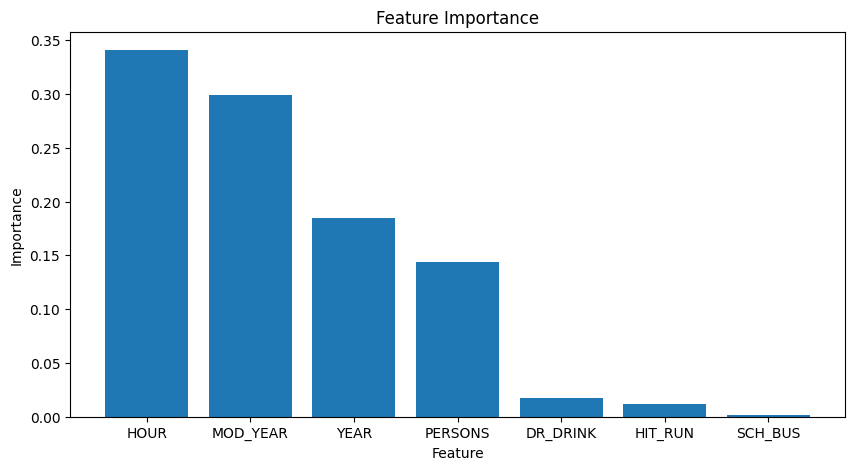

In [39]:
impts = rf_mod_1.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs]) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [40]:
# Confusion Matrix:

# Create confusion matrix
conf_mat_1 = confusion_matrix(y_test_1, preds_mod_1)

# Empty sens and spec lists
sens_list = []
spec_list = []

# Find sensitivity and specificity for each class, where "positive" means equal to 
# the class and "negative" means not equal to the class
for i in range(conf_mat_1.shape[0]):
    TP = conf_mat_1[i, i]
    FN = np.sum(conf_mat_1[i, :]) - TP
    FP = np.sum(conf_mat_1[:, i]) - TP
    TN = np.sum(conf_mat_1) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

# Print out classes' sens and spec values
for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.5256124721603563, Specificity = 0.5957149510945505
Class 1: Sensitivity = 0.5660964230171073, Specificity = 0.5377358490566038
Class 2: Sensitivity = 0.01098901098901099, Specificity = 0.977931401223079
Class 3: Sensitivity = 0.037037037037037035, Specificity = 0.9966802860061287
Class 4: Sensitivity = 0.0, Specificity = 0.9979679959359918
Class 5: Sensitivity = 0.0, Specificity = 1.0
Class 6: Sensitivity = nan, Specificity = 0.9997463860005072
Class 7: Sensitivity = 0.0, Specificity = 1.0


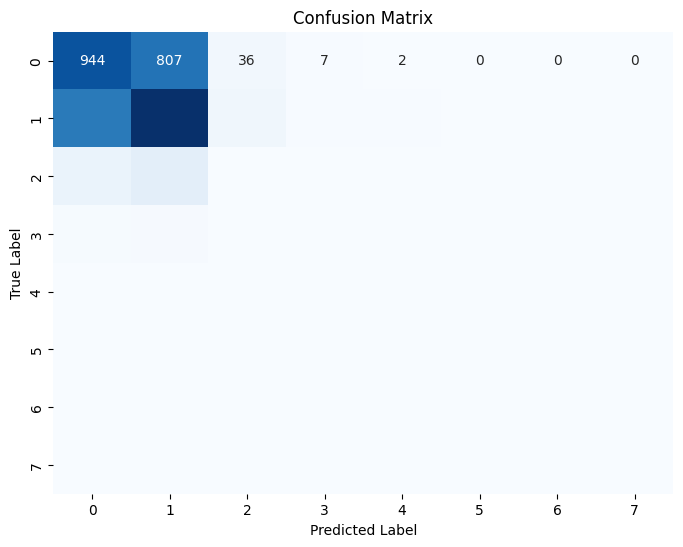

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Model 2 - Accidents from 1982 to 1990:

In [42]:
# Make sure all variables are quantitative:
X_train_2.dtypes

YEAR             int64
PERSONS          int64
HOUR             int64
MILE_MARKER    float64
SCH_BUS          int64
HIT_RUN          int64
MOD_YEAR       float64
DR_DRINK         int64
dtype: object

In [43]:
rf_mod_2 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_2.fit(X_train_2, y_train_2)

# Test Predictions
preds_mod_2 = rf_mod_2.predict(X_test_2)

# Accuracy
acc_mod_2 = accuracy_score(y_test_2, preds_mod_2)
print("Test Accuracy:", acc_mod_2)


Test Accuracy: 0.5247122545700744


In [44]:
# Feature Importance Plot:
impts = rf_mod_2.feature_importances_

feature_names = X_train_2.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


HOUR: 0.26170273922314746
MOD_YEAR: 0.2565181326674756
MILE_MARKER: 0.17335615973531993
PERSONS: 0.12660705597241678
YEAR: 0.08741522271041682
DR_DRINK: 0.06459357973119548
HIT_RUN: 0.028187956057086953
SCH_BUS: 0.0016191539029409778


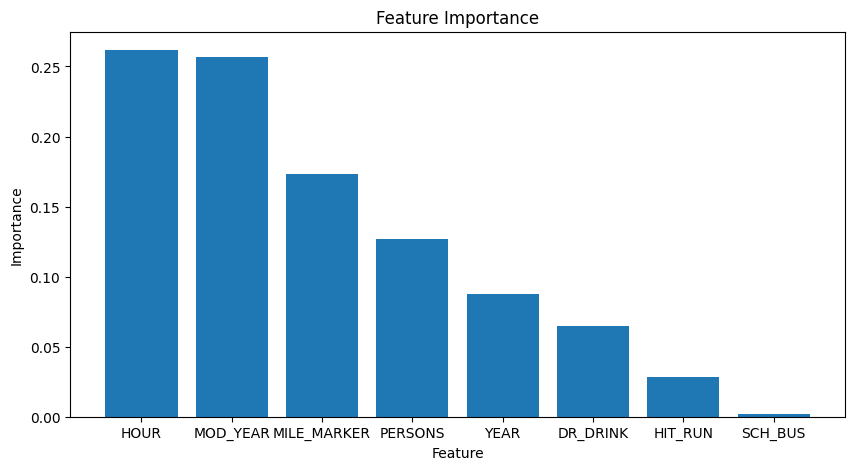

In [45]:
impts = rf_mod_2.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs]) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [46]:
# Confusion Matrix:

# Create confusion matrix
conf_mat_2 = confusion_matrix(y_test_2, preds_mod_2)

# Empty sens and spec lists
sens_list = []
spec_list = []

# Find sensitivity and specificity for each class, where "positive" means equal to 
# the class and "negative" means not equal to the class
for i in range(conf_mat_2.shape[0]):
    TP = conf_mat_2[i, i]
    FN = np.sum(conf_mat_2[i, :]) - TP
    FP = np.sum(conf_mat_2[:, i]) - TP
    TN = np.sum(conf_mat_2) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

# Print out classes' sens and spec values
for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.45977011494252873, Specificity = 0.6355606758832565
Class 1: Sensitivity = 0.6289842753931152, Specificity = 0.4687199230028874
Class 2: Sensitivity = 0.023809523809523808, Specificity = 0.9888651978204217
Class 3: Sensitivity = 0.0, Specificity = 0.9988654413433175
Class 4: Sensitivity = 0.0, Specificity = 1.0
Class 5: Sensitivity = 0.0, Specificity = 0.9997741133950757
Class 6: Sensitivity = 0.0, Specificity = 1.0
Class 7: Sensitivity = 0.0, Specificity = 1.0


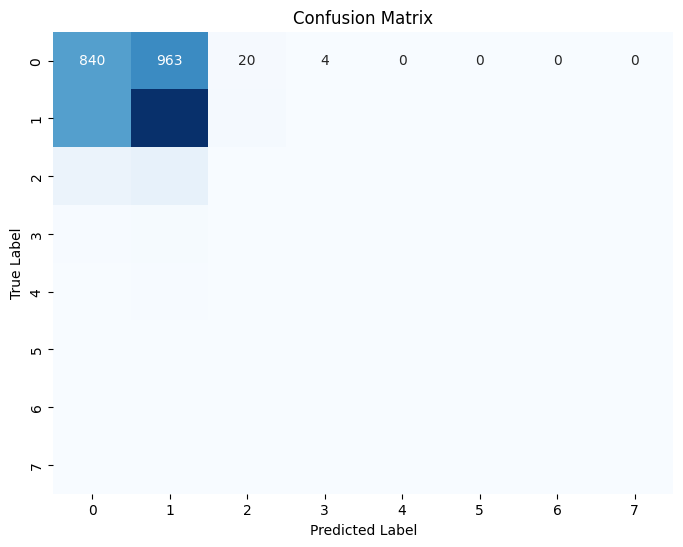

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Model 3 - Accidents from 1991 to 2000:

In [48]:
# Make sure all variables are quantitative:
X_train_3.dtypes

YEAR             int64
NUM_PEDS         int64
PERSONS          int64
HOUR             int64
MILE_MARKER    float64
SCH_BUS          int64
HIT_RUN          int64
MOD_YEAR       float64
DR_DRINK         int64
dtype: object

In [49]:
rf_mod_3 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_3.fit(X_train_3, y_train_3)

# Test Predictions
preds_mod_3 = rf_mod_3.predict(X_test_3)

# Accuracy
acc_mod_3 = accuracy_score(y_test_3, preds_mod_3)
print("Test Accuracy:", acc_mod_3)


Test Accuracy: 0.5212443095599393


In [50]:
# Feature Importance Plot:
impts = rf_mod_3.feature_importances_

feature_names = X_train_3.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


MILE_MARKER: 0.2932285397615544
HOUR: 0.2002986656152841
MOD_YEAR: 0.1999744508793154
YEAR: 0.1155394192846449
PERSONS: 0.10229403938871247
DR_DRINK: 0.04565931671503813
NUM_PEDS: 0.02500458580348869
HIT_RUN: 0.01634385204863613
SCH_BUS: 0.00165713050332575


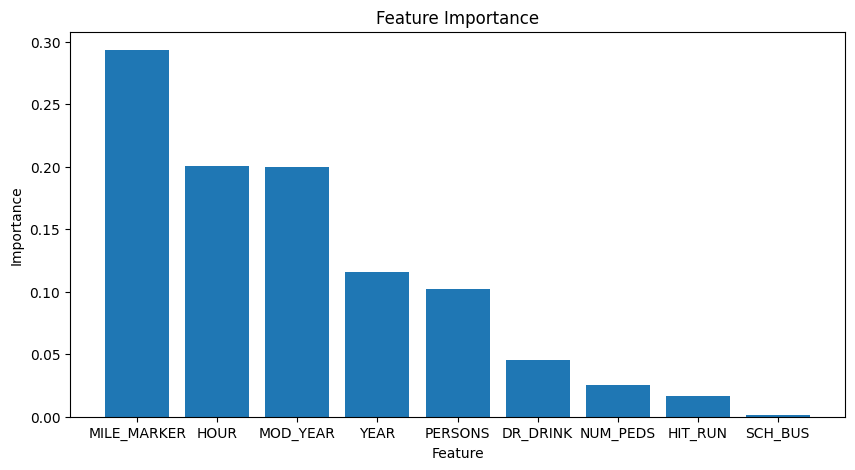

In [51]:
impts = rf_mod_3.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs]) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [52]:
# Confusion Matrix:

# Create confusion matrix
conf_mat_3 = confusion_matrix(y_test_3, preds_mod_3)

# Empty sens and spec lists
sens_list = []
spec_list = []

# Find sensitivity and specificity for each class, where "positive" means equal to 
# the class and "negative" means not equal to the class
for i in range(conf_mat_3.shape[0]):
    TP = conf_mat_3[i, i]
    FN = np.sum(conf_mat_3[i, :]) - TP
    FP = np.sum(conf_mat_3[:, i]) - TP
    TN = np.sum(conf_mat_3) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

# Print out classes' sens and spec values
for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.3729903536977492, Specificity = 0.6807002917882451
Class 1: Sensitivity = 0.6795224977043158, Specificity = 0.37894144144144143
Class 2: Sensitivity = 0.005154639175257732, Specificity = 0.9938829787234043
Class 3: Sensitivity = 0.0, Specificity = 1.0
Class 4: Sensitivity = 0.0, Specificity = 0.9997467713345151
Class 5: Sensitivity = 0.0, Specificity = 1.0


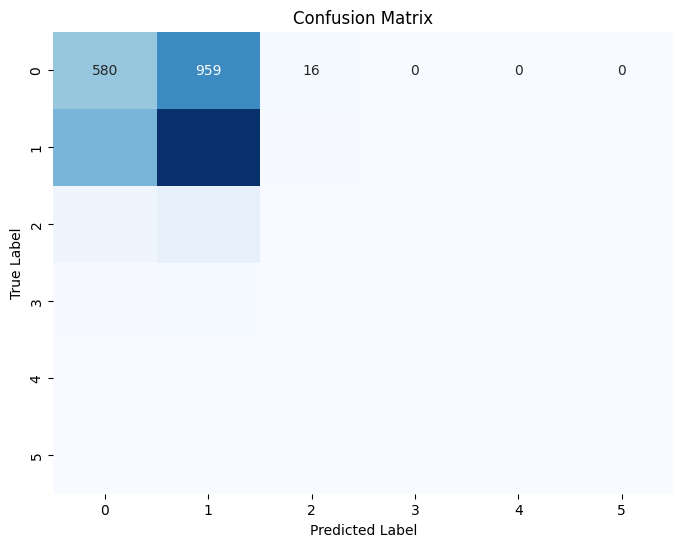

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Model 4 - Accidents from 2001 to 2007:

In [54]:
# Make sure all variables are quantitative:
X_train_4.dtypes

YEAR             int64
NUM_PEDS         int64
PERSONS          int64
HOUR             int64
MILE_MARKER    float64
SCH_BUS          int64
MOD_YEAR       float64
DR_DRINK         int64
HIT_RUN          int64
dtype: object

In [55]:
rf_mod_4 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_4.fit(X_train_4, y_train_4)

# Test Predictions
preds_mod_4 = rf_mod_4.predict(X_test_4)

# Accuracy
acc_mod_4 = accuracy_score(y_test_4, preds_mod_4)
print("Test Accuracy:", acc_mod_4)


Test Accuracy: 0.5462396545519971


In [56]:
# Feature Importance Plot:
impts = rf_mod_4.feature_importances_

feature_names = X_train_4.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


MILE_MARKER: 0.25310105632516516
MOD_YEAR: 0.22761422415790303
HOUR: 0.2271209276964557
PERSONS: 0.1127786802585383
YEAR: 0.09124475568515265
DR_DRINK: 0.03566646872865187
NUM_PEDS: 0.027096920750572007
HIT_RUN: 0.02397334066435334
SCH_BUS: 0.0014036257332080168


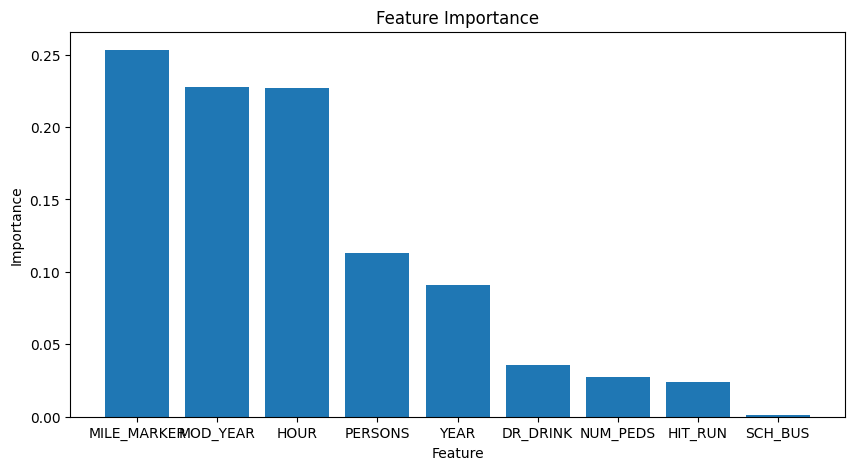

In [57]:
impts = rf_mod_4.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs]) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [58]:
# Confusion Matrix:

# Create confusion matrix
conf_mat_4 = confusion_matrix(y_test_4, preds_mod_4)

# Empty sens and spec lists
sens_list = []
spec_list = []

# Find sensitivity and specificity for each class, where "positive" means equal to 
# the class and "negative" means not equal to the class
for i in range(conf_mat_4.shape[0]):
    TP = conf_mat_4[i, i]
    FN = np.sum(conf_mat_4[i, :]) - TP
    FP = np.sum(conf_mat_4[:, i]) - TP
    TN = np.sum(conf_mat_4) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

# Print out classes' sens and spec values
for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.3521951219512195, Specificity = 0.7194982896237172
Class 1: Sensitivity = 0.718187461204221, Specificity = 0.3561643835616438
Class 2: Sensitivity = 0.0, Specificity = 0.9943651389932382
Class 3: Sensitivity = 0.0, Specificity = 0.9996374184191443
Class 4: Sensitivity = 0.0, Specificity = 0.9996396396396396
Class 5: Sensitivity = 0.0, Specificity = 1.0


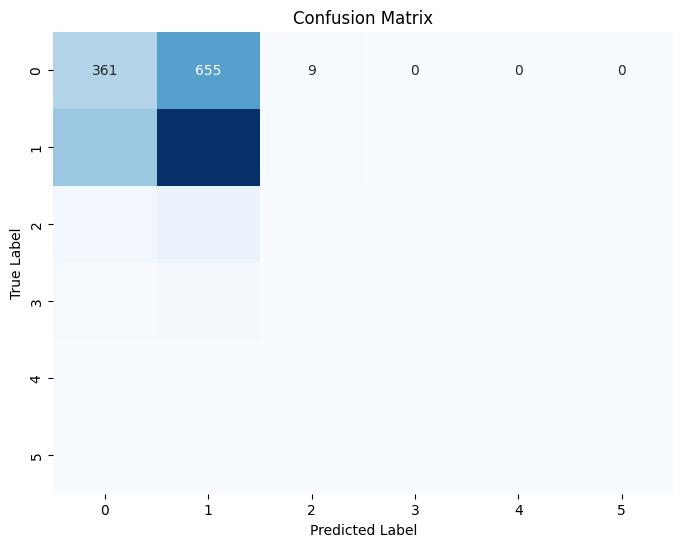

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_4, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Model 5 - Accidents from 2008 to 2014:

In [60]:
# Make sure all variables are quantitative:
X_train_5.dtypes

YEAR             int64
NUM_PEDS         int64
NUM_VEHC         int64
PERSONS          int64
HOUR             int64
MILE_MARKER    float64
SCH_BUS          int64
MOD_YEAR       float64
DR_DRINK         int64
HIT_RUN          int64
dtype: object

In [61]:
rf_mod_5 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_5.fit(X_train_5, y_train_5)

# Test Predictions
preds_mod_5 = rf_mod_5.predict(X_test_5)

# Accuracy
acc_mod_5 = accuracy_score(y_test_5, preds_mod_5)
print("Test Accuracy:", acc_mod_5)


Test Accuracy: 0.556663644605621


In [62]:
# Feature Importance Plot:
impts = rf_mod_5.feature_importances_

feature_names = X_train_5.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


HOUR: 0.25283448573404843
MOD_YEAR: 0.24458778966326877
YEAR: 0.12042109461718793
MILE_MARKER: 0.11910122120934552
PERSONS: 0.0899329888847079
DR_DRINK: 0.07218496214590285
NUM_VEHC: 0.04575549243273388
NUM_PEDS: 0.029488159411974975
HIT_RUN: 0.02311362296330627
SCH_BUS: 0.0025801829375236185


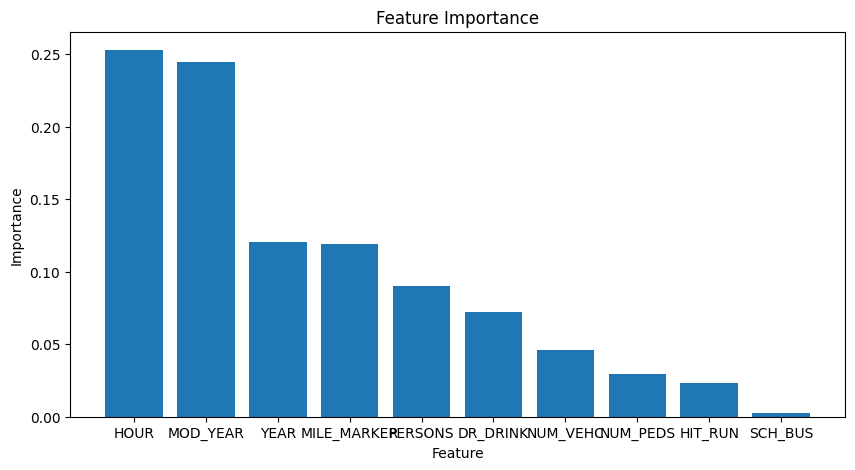

In [63]:
impts = rf_mod_5.feature_importances_

idxs = np.argsort(impts)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(impts)), impts[idxs], align="center")
plt.xticks(range(len(impts)), [feature_names[i] for i in idxs]) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [64]:
# Confusion Matrix:

# Create confusion matrix
conf_mat_5 = confusion_matrix(y_test_5, preds_mod_5)

# Empty sens and spec lists
sens_list = []
spec_list = []

# Find sensitivity and specificity for each class, where "positive" means equal to 
# the class and "negative" means not equal to the class
for i in range(conf_mat_5.shape[0]):
    TP = conf_mat_5[i, i]
    FN = np.sum(conf_mat_5[i, :]) - TP
    FP = np.sum(conf_mat_5[:, i]) - TP
    TN = np.sum(conf_mat_5) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

# Print out classes' sens and spec values
for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.4204131227217497, Specificity = 0.6869125090383225
Class 1: Sensitivity = 0.6829457364341085, Specificity = 0.4203056768558952
Class 2: Sensitivity = 0.011904761904761904, Specificity = 0.9943449575871819
Class 3: Sensitivity = 0.0, Specificity = 0.9990909090909091
Class 4: Sensitivity = 0.0, Specificity = 1.0


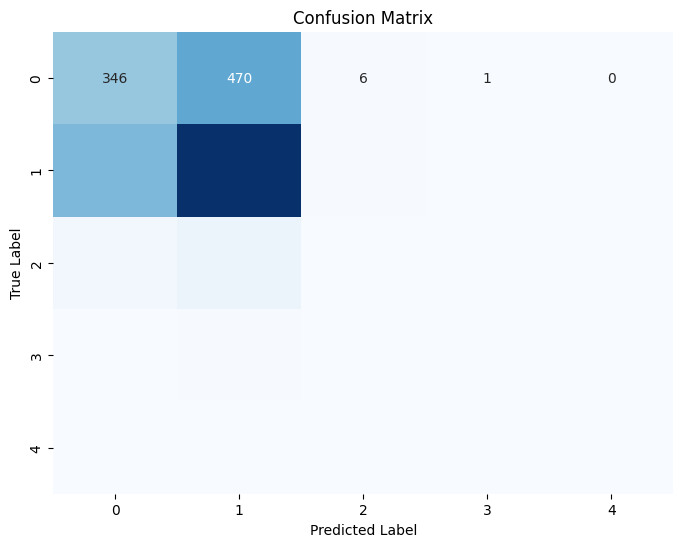

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_5, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Model 6 - Accidents from 2015 to 2022:

In [66]:
# Make sure all variables are quantitative:
X_train_6.dtypes

YEAR                               int64
NUM_PEDS                           int64
NUM_VEHC                           int64
PERSONS                            int64
DAYNAME                            int64
                                   ...  
WEATHERNAME_Rain                    bool
WEATHERNAME_Reported as Unknown     bool
WEATHERNAME_Severe Crosswinds       bool
WEATHERNAME_Snow                    bool
WEATHERNAME_Unknown                 bool
Length: 116, dtype: object

In [67]:
rf_mod_6 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_mod_6.fit(X_train_6, y_train_6)

# Test Predictions
preds_mod_6 = rf_mod_6.predict(X_test_6)

# Accuracy
acc_mod_6 = accuracy_score(y_test_6, preds_mod_6)
print("Test Accuracy:", acc_mod_6)


Test Accuracy: 0.5059732958538299


In [68]:
# Feature Importance Plot:
impts = rf_mod_6.feature_importances_

feature_names = X_train_6.columns

idxs = np.argsort(impts)[::-1]

for i in idxs:
    print(f"{feature_names[i]}: {impts[i]}")


MOD_YEAR: 0.18917104263153742
DAYNAME: 0.06374275167842126
MILE_MARKER: 0.06065110351365742
HOUR: 0.05969109645025453
DR_DRINK: 0.04843811432964819
YEAR: 0.0373561812474956
PERSONS: 0.0319133702558847
HIT_RUN: 0.021576110595908096
NUM_VEHC: 0.01617747591466021
ROUTENAME_State Highway: 0.012832914758113094
FUNC_SYSNAME_Principal Arterial - Other: 0.011804752620697747
FUNC_SYSNAME_Minor Arterial: 0.011782703152314196
DAY_WEEKNAME_Saturday: 0.011660792801281442
DAY_WEEKNAME_Friday: 0.011444306812806062
WEATHERNAME_Clear: 0.011369488573448085
NUM_PEDS: 0.011277249477514762
LGT_CONDNAME_Daylight: 0.011229770197109017
LGT_CONDNAME_Dark - Not Lighted: 0.010896161376429412
DAY_WEEKNAME_Sunday: 0.010537513611736027
DAY_WEEKNAME_Thursday: 0.010473043847266612
TYP_INTNAME_Not an Intersection: 0.010413940459677064
RUR_URBNAME_Rural: 0.01012227829856961
WEATHERNAME_Cloudy: 0.010033634670847358
DAY_WEEKNAME_Wednesday: 0.009892295608083412
MONTHNAME_September: 0.009714625050055681
ROUTENAME_County Ro

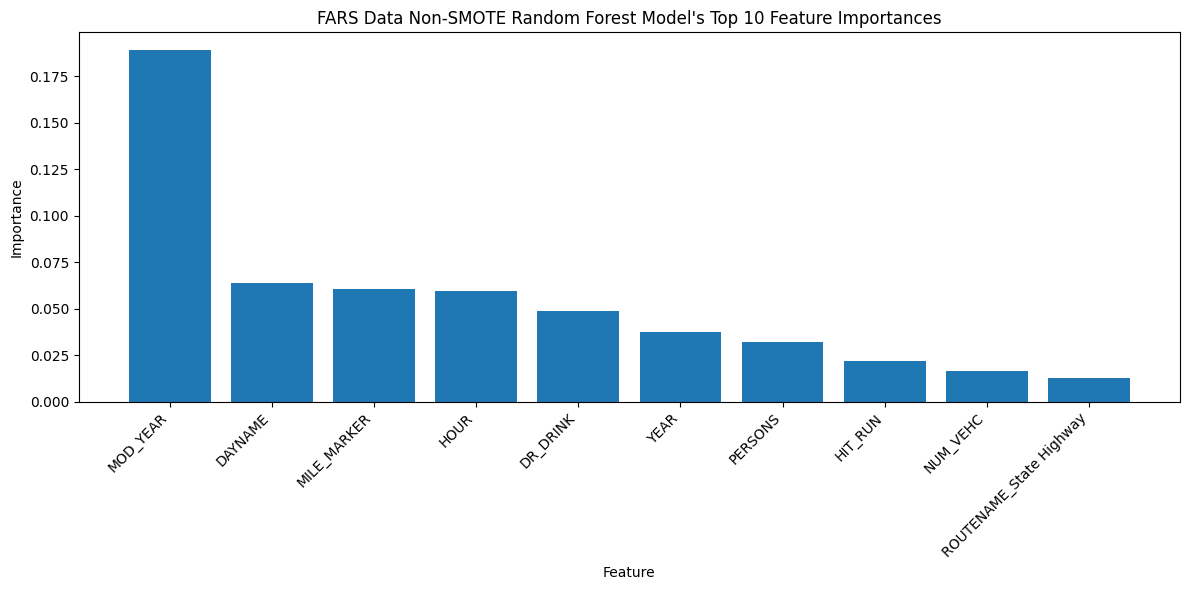

In [69]:
impts = rf_mod_6.feature_importances_

idxs = np.argsort(impts)[::-1]

# Top 10 indices
top_idxs = idxs[:10]

# Plotting only top 25
plt.figure(figsize=(12, 6))
plt.title("FARS Data Non-SMOTE Random Forest Model's Top 10 Feature Importances")
plt.bar(range(len(top_idxs)), impts[top_idxs], align="center")
plt.xticks(range(len(top_idxs)), [feature_names[i] for i in top_idxs], rotation=45, ha='right') 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout() 
plt.show()



In [70]:
# Confusion Matrix:

# Create confusion matrix
conf_mat_6 = confusion_matrix(y_test_6, preds_mod_6)

# Empty sens and spec lists
sens_list = []
spec_list = []

# Find sensitivity and specificity for each class, where "positive" means equal to 
# the class and "negative" means not equal to the class
for i in range(conf_mat_6.shape[0]):
    TP = conf_mat_6[i, i]
    FN = np.sum(conf_mat_6[i, :]) - TP
    FP = np.sum(conf_mat_6[:, i]) - TP
    TN = np.sum(conf_mat_6) - (TP + FN + FP)
    
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    
    sens_list.append(sens)
    spec_list.append(spec)

# Print out classes' sens and spec values
for i, (sens, spec) in enumerate(zip(sens_list, spec_list)):
    print(f"Class {i}: Sensitivity = {sens}, Specificity = {spec}")


Class 0: Sensitivity = 0.41150442477876104, Specificity = 0.6328671328671329
Class 1: Sensitivity = 0.6350184956843403, Specificity = 0.43218954248366015
Class 2: Sensitivity = 0.0, Specificity = 0.9913232104121475
Class 3: Sensitivity = 0.0, Specificity = 0.999647266313933
Class 4: Sensitivity = 0.0, Specificity = 0.9996485061511423
Class 5: Sensitivity = 0.0, Specificity = 1.0


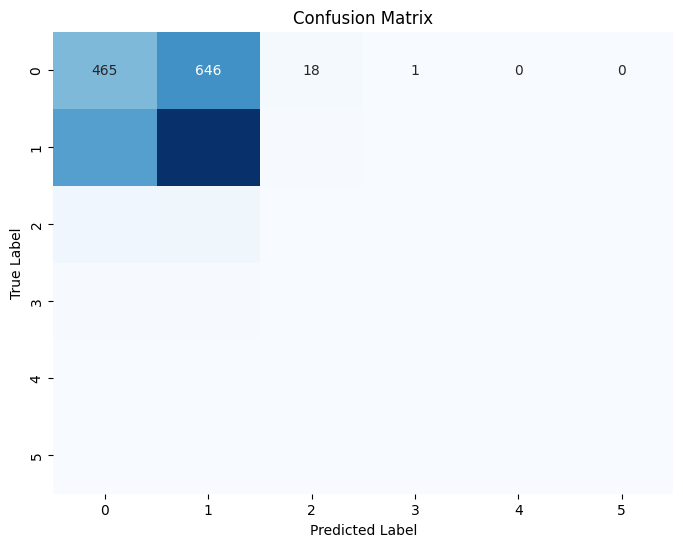

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_6, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Feed Forward Neural Networks:

In [72]:
type(X_train_1)

pandas.core.frame.DataFrame

In [73]:
type(y_train_1)

pandas.core.series.Series

In [74]:
X_train_1.shape

(11827, 7)

In [75]:
y_train_1.shape

(11827,)

#### Justification of Each Neural Network Component:

I used a ReLU activation because deaths cannot be < 0, so a ReLU function is the most suitable activation function. The softmax function is appropriate because the response variable has 4 categories to choose among. 

I chose the Adam optimizer because it can adapt the model parameters' learning rates based on past gradients. Addiitonally, this optimizer makes use of a measure called the momentum, which helps the optimizer speed up the process of learning based on previous gradients' effect on the direction to update values.

The loss function of sparse categorical cross-entropy is appropriate for multi-class classification with 3 or more categories & when the target variable is an integer. 


In [76]:
print(np.unique(y_train_1))

[0. 1. 2. 3. 4. 5. 6. 7. 9.]


In [112]:
y_train_1_int = y_train_1.replace({'0': 0, '1': 1, '2': 2, '3': 3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9})

print(np.unique(y_train_1_int))

[0. 1. 2. 3. 4. 5. 6. 7. 9.]


In [113]:
model_1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(7,)), # input shape of 7 since this time period's df has 7 features
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 neurons for 10 categories
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

history_1 = model_1.fit(X_train_1, y_train_1_int, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
148/148 [==============================] - 1s 2ms/step - loss: 39.2455 - accuracy: 0.4019 - val_loss: 1.9603 - val_accuracy: 0.4552
Epoch 2/50
148/148 [==============================] - 0s 1ms/step - loss: 1.4639 - accuracy: 0.4821 - val_loss: 1.7674 - val_accuracy: 0.4873
Epoch 3/50
148/148 [==============================] - 0s 1ms/step - loss: 1.4146 - accuracy: 0.4772 - val_loss: 1.2381 - val_accuracy: 0.4894
Epoch 4/50
148/148 [==============================] - 0s 1ms/step - loss: 1.1570 - accuracy: 0.4811 - val_loss: 1.0998 - val_accuracy: 0.4941
Epoch 5/50
148/148 [==============================] - 0s 1ms/step - loss: 1.0657 - accuracy: 0.4846 - val_loss: 1.2067 - val_accuracy: 0.4873
Epoch 6/50
148/148 [==============================] - 0s 1ms/step - loss: 1.0860 - accuracy: 0.4878 - val_loss: 1.7311 - val_accuracy: 0.4548
Epoch 7/50
148/148 [==============================] - 0s 1ms/step - loss: 1.2060 - accuracy: 0.4711 - val_loss: 1.1847 - val_accuracy: 0.4915
Epoch

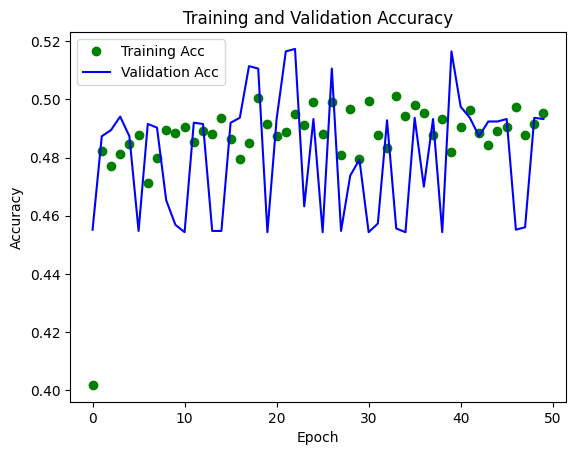

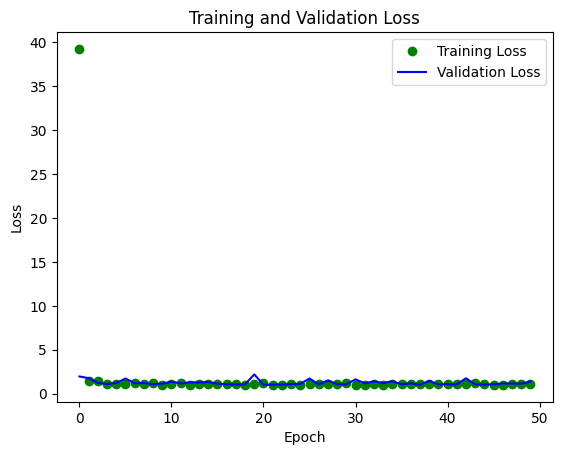

In [158]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', color='green', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plt.savefig('accuracy.png', bbox_inches='tight')
plt.figure()

# Maybe change the y-axis range so that it shows a more zoomed in plot
plt.plot(epochs, loss, 'bo', color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plt.savefig('loss.png', bbox_inches='tight')
plt.show()

In [114]:
np.unique(y_train_1.dtypes)

array([dtype('float64')], dtype=object)

In [115]:
np.unique(y_test_1.dtypes)

array([dtype('float64')], dtype=object)

In [116]:
# Evaluate the model 
loss_1, accuracy_1 = model_1.evaluate(X_test_1, y_test_1)
print("Accuracy on test set: {:.2f}%".format(accuracy_1 * 100))


124/124 [==============================] - 0s 963us/step - loss: 1.3102 - accuracy: 0.4951
Accuracy on test set: 49.51%


In [117]:
X_train_2.shape

(13290, 8)

In [118]:
y_train_2.shape

(13290,)

In [119]:
y_train_2_int = y_train_2.replace({'0': 0, '1': 1, '2': 2, '3': 3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9})

print(np.unique(y_train_2_int))

[0 1 2 3 4 5 6 7]


In [120]:
model_2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(8,)),  # input shape of 8 since this time period's df has 8 features
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history_2 = model_2.fit(X_train_2, y_train_2_int, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
167/167 [==============================] - 1s 2ms/step - loss: 156.7929 - accuracy: 0.4471 - val_loss: 48.1858 - val_accuracy: 0.4868
Epoch 2/50
167/167 [==============================] - 0s 1ms/step - loss: 74.6095 - accuracy: 0.4611 - val_loss: 41.4207 - val_accuracy: 0.4665
Epoch 3/50
167/167 [==============================] - 0s 1ms/step - loss: 60.1169 - accuracy: 0.4666 - val_loss: 174.5164 - val_accuracy: 0.4112
Epoch 4/50
167/167 [==============================] - 0s 1ms/step - loss: 75.6246 - accuracy: 0.4614 - val_loss: 43.9551 - val_accuracy: 0.5139
Epoch 5/50
167/167 [==============================] - 0s 1ms/step - loss: 51.1657 - accuracy: 0.4589 - val_loss: 38.7559 - val_accuracy: 0.5312
Epoch 6/50
167/167 [==============================] - 0s 1ms/step - loss: 40.8317 - accuracy: 0.4708 - val_loss: 108.8362 - val_accuracy: 0.4112
Epoch 7/50
167/167 [==============================] - 0s 1ms/step - loss: 46.3201 - accuracy: 0.4581 - val_loss: 109.0308 - val_accur

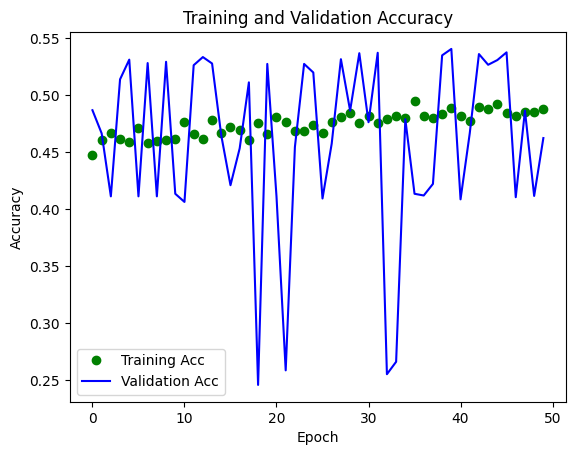

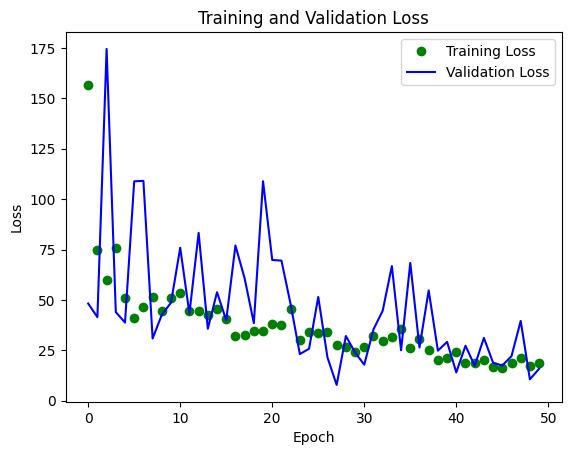

In [160]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', color='green', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plt.savefig('accuracy.png', bbox_inches='tight')
plt.figure()

plt.plot(epochs, loss, 'bo', color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plt.savefig('loss.png', bbox_inches='tight')
plt.show()

In [121]:
loss_2, accuracy_2 = model_2.evaluate(X_test_2, y_test_2)
print("Accuracy on test set: {:.2f}%".format(accuracy_2 * 100))


139/139 [==============================] - 0s 928us/step - loss: 14.2480 - accuracy: 0.4516
Accuracy on test set: 45.16%


In [122]:
X_train_3.shape

(11862, 9)

In [123]:
y_train_3.shape

(11862,)

In [124]:
y_train_3_int = y_train_3.replace({'0': 0, '1': 1, '2': 2, '3': 3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9})

print(np.unique(y_train_3_int))

[0 1 2 3 4 5]


In [125]:
model_3 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(9,)),  # input shape of 9 since this time period's df has 9 features
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history_3 = model_3.fit(X_train_3, y_train_3_int, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
149/149 [==============================] - 1s 2ms/step - loss: 24.3156 - accuracy: 0.4725 - val_loss: 2.7727 - val_accuracy: 0.4210
Epoch 2/50
149/149 [==============================] - 0s 1ms/step - loss: 2.7994 - accuracy: 0.4940 - val_loss: 1.8885 - val_accuracy: 0.5491
Epoch 3/50
149/149 [==============================] - 0s 1ms/step - loss: 2.7593 - accuracy: 0.4962 - val_loss: 1.6051 - val_accuracy: 0.5504
Epoch 4/50
149/149 [==============================] - 0s 1ms/step - loss: 3.2946 - accuracy: 0.4853 - val_loss: 3.2813 - val_accuracy: 0.3645
Epoch 5/50
149/149 [==============================] - 0s 1ms/step - loss: 3.1147 - accuracy: 0.4897 - val_loss: 4.6965 - val_accuracy: 0.4159
Epoch 6/50
149/149 [==============================] - 0s 1ms/step - loss: 2.9806 - accuracy: 0.4989 - val_loss: 3.3087 - val_accuracy: 0.3970
Epoch 7/50
149/149 [==============================] - 0s 1ms/step - loss: 2.5442 - accuracy: 0.5146 - val_loss: 1.8194 - val_accuracy: 0.5491
Epoch

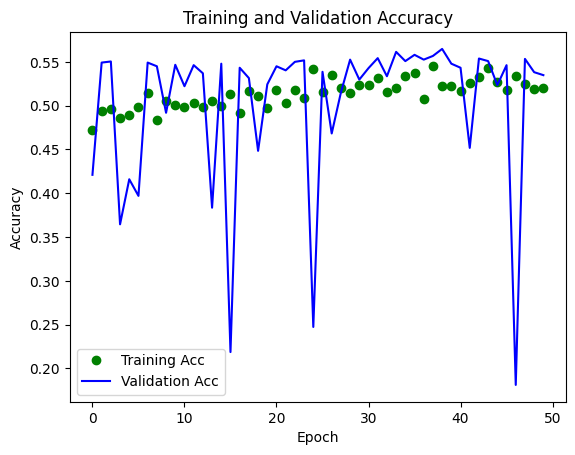

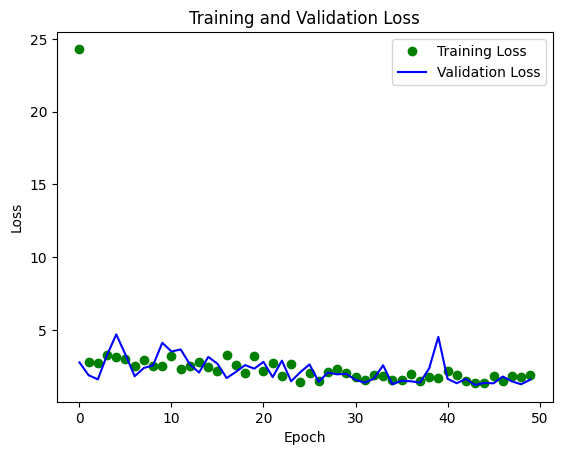

In [161]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', color='green', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plt.savefig('accuracy.png', bbox_inches='tight')
plt.figure()

plt.plot(epochs, loss, 'bo', color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plt.savefig('loss.png', bbox_inches='tight')
plt.show()

In [126]:
loss_3, accuracy_3 = model_3.evaluate(X_test_3, y_test_3)
print("Accuracy on test set: {:.2f}%".format(accuracy_3 * 100))


124/124 [==============================] - 0s 942us/step - loss: 1.7458 - accuracy: 0.5415
Accuracy on test set: 54.15%


In [127]:
X_train_4.shape

(8334, 9)

In [128]:
y_train_4.shape

(8334,)

In [129]:
y_train_4_int = y_train_4.replace({'0': 0, '1': 1, '2': 2, '3': 3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9})

print(np.unique(y_train_4_int))


[0 1 2 3 4 5 6]


In [130]:
model_4 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(9,)),  # input shape of 9 since this time period's df has 9 features
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history_4 = model_4.fit(X_train_4, y_train_4_int, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
105/105 [==============================] - 1s 2ms/step - loss: 24.8968 - accuracy: 0.4738 - val_loss: 1.5924 - val_accuracy: 0.3695
Epoch 2/50
105/105 [==============================] - 0s 1ms/step - loss: 2.3963 - accuracy: 0.4890 - val_loss: 3.2850 - val_accuracy: 0.3659
Epoch 3/50
105/105 [==============================] - 0s 1ms/step - loss: 2.4005 - accuracy: 0.4782 - val_loss: 3.9782 - val_accuracy: 0.0480
Epoch 4/50
105/105 [==============================] - 0s 1ms/step - loss: 4.1101 - accuracy: 0.4837 - val_loss: 4.3190 - val_accuracy: 0.0714
Epoch 5/50
105/105 [==============================] - 0s 1ms/step - loss: 2.6895 - accuracy: 0.4771 - val_loss: 6.6918 - val_accuracy: 0.3653
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 2.3578 - accuracy: 0.4959 - val_loss: 2.2159 - val_accuracy: 0.3659
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 3.7053 - accuracy: 0.4849 - val_loss: 3.8486 - val_accuracy: 0.5867
Epoch

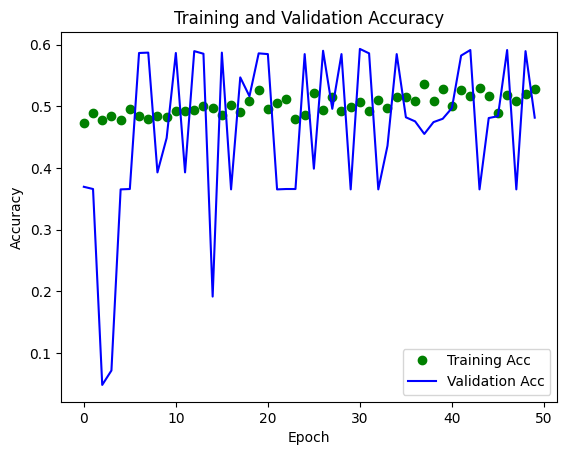

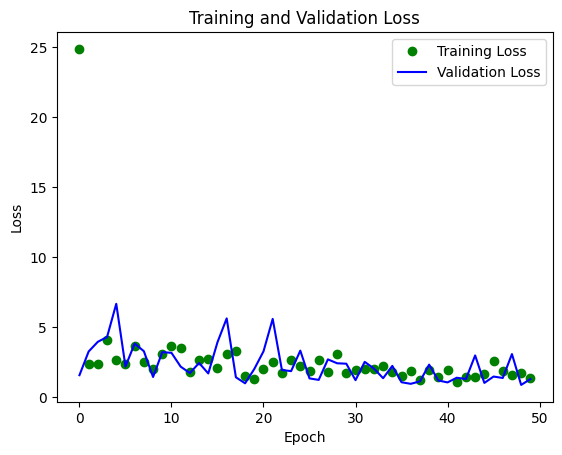

In [162]:
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', color='green', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plt.savefig('accuracy.png', bbox_inches='tight')
plt.figure()

# Maybe change the y-axis range so that it shows a more zoomed in plot
plt.plot(epochs, loss, 'bo', color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plt.savefig('loss.png', bbox_inches='tight')
plt.show()

In [131]:
loss_4, accuracy_4 = model_4.evaluate(X_test_4, y_test_4)
print("Accuracy on test set: {:.2f}%".format(accuracy_4 * 100))


87/87 [==============================] - 0s 968us/step - loss: 1.3352 - accuracy: 0.5016
Accuracy on test set: 50.16%


In [132]:
X_train_5.shape

(6618, 10)

In [133]:
y_train_5.shape

(6618,)

In [134]:
y_train_5_int = y_train_5.replace({'0': 0, '1': 1, '2': 2, '3': 3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9})

print(np.unique(y_train_5_int))


[0 1 2 3 4 7]


In [135]:
model_5 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),  # input shape of 10 since this time period's df has 10 features
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

history_5 = model_5.fit(X_train_5, y_train_5_int, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
83/83 [==============================] - 1s 3ms/step - loss: 79.9601 - accuracy: 0.3821 - val_loss: 2.7584 - val_accuracy: 0.5793
Epoch 2/50
83/83 [==============================] - 0s 1ms/step - loss: 2.2404 - accuracy: 0.5079 - val_loss: 1.7433 - val_accuracy: 0.5423
Epoch 3/50
83/83 [==============================] - 0s 2ms/step - loss: 1.7115 - accuracy: 0.5246 - val_loss: 1.7269 - val_accuracy: 0.4298
Epoch 4/50
83/83 [==============================] - 0s 2ms/step - loss: 2.0529 - accuracy: 0.5083 - val_loss: 2.0525 - val_accuracy: 0.4675
Epoch 5/50
83/83 [==============================] - 0s 2ms/step - loss: 1.5746 - accuracy: 0.5164 - val_loss: 2.2937 - val_accuracy: 0.3618
Epoch 6/50
83/83 [==============================] - 0s 2ms/step - loss: 2.0340 - accuracy: 0.5108 - val_loss: 1.5480 - val_accuracy: 0.3489
Epoch 7/50
83/83 [==============================] - 0s 2ms/step - loss: 1.6178 - accuracy: 0.5151 - val_loss: 2.0467 - val_accuracy: 0.5423
Epoch 8/50
83/83 [=

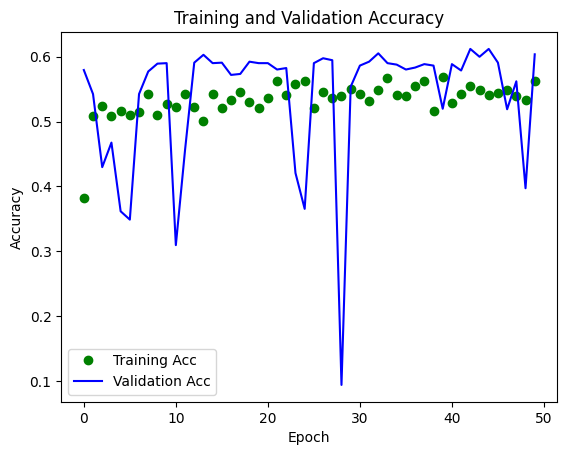

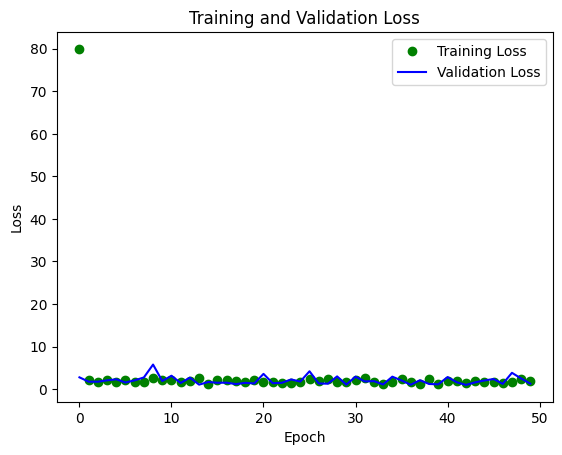

In [163]:
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', color='green', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plt.savefig('accuracy.png', bbox_inches='tight')
plt.figure()

# Maybe change the y-axis range so that it shows a more zoomed in plot
plt.plot(epochs, loss, 'bo', color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plt.savefig('loss.png', bbox_inches='tight')
plt.show()

In [136]:
loss_5, accuracy_5 = model_5.evaluate(X_test_5, y_test_5)
print("Accuracy on test set: {:.2f}%".format(accuracy_5 * 100))


69/69 [==============================] - 0s 1ms/step - loss: 1.3130 - accuracy: 0.5798
Accuracy on test set: 57.98%


In [137]:
X_train_6.shape

(8535, 116)

In [138]:
y_train_6.shape

(8535,)

In [139]:
y_train_6_int = y_train_6.replace({'0': 0, '1': 1, '2': 2, '3': 3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9})

print(np.unique(y_train_6_int))

[0 1 2 3 4 5 8]


In [140]:
type(X_train_6)

pandas.core.frame.DataFrame

In [141]:
type(y_train_6_int)

pandas.core.series.Series

In [142]:
model_6 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(116,)),  
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

model_6.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Convert all int64, float64 & boolean columns in X_train_6 to float32 
# because neural network wants data types to be consistent for all columns
X_train_6 = X_train_6.astype('float32')

# Double checking that the labels are all integers
y_train_6_int = y_train_6_int.astype('int')

history_6 = model_6.fit(X_train_6, y_train_6_int, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
107/107 [==============================] - 1s 2ms/step - loss: 7.7217 - accuracy: 0.4665 - val_loss: 1.1586 - val_accuracy: 0.5032
Epoch 2/50
107/107 [==============================] - 0s 1ms/step - loss: 1.3345 - accuracy: 0.5057 - val_loss: 1.5454 - val_accuracy: 0.5431
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 1.7985 - accuracy: 0.4956 - val_loss: 3.0248 - val_accuracy: 0.5431
Epoch 4/50
107/107 [==============================] - 0s 2ms/step - loss: 1.4380 - accuracy: 0.5013 - val_loss: 0.9013 - val_accuracy: 0.5782
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 1.0703 - accuracy: 0.5293 - val_loss: 1.1020 - val_accuracy: 0.5472
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 1.1645 - accuracy: 0.5124 - val_loss: 1.1061 - val_accuracy: 0.5495
Epoch 7/50
107/107 [==============================] - 0s 2ms/step - loss: 1.1377 - accuracy: 0.5310 - val_loss: 1.1501 - val_accuracy: 0.5776
Epoch 

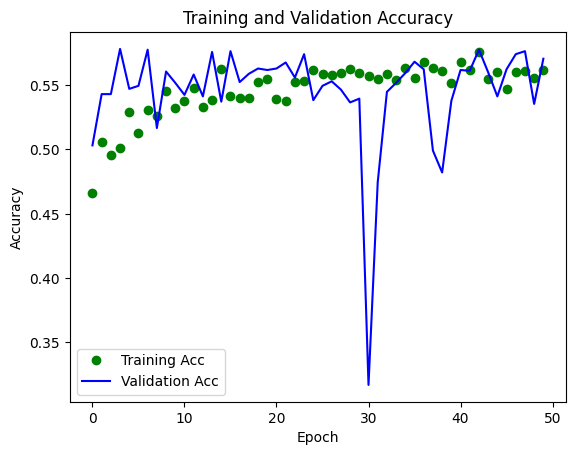

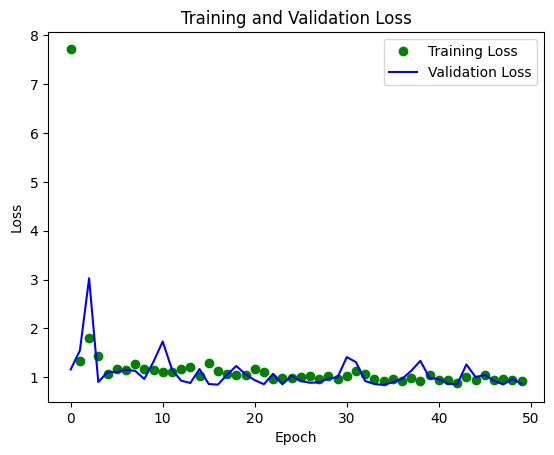

In [164]:
acc = history_6.history['accuracy']
val_acc = history_6.history['val_accuracy']
loss = history_6.history['loss']
val_loss = history_6.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', color='green', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plt.savefig('accuracy.png', bbox_inches='tight')
plt.figure()

# Maybe change the y-axis range so that it shows a more zoomed in plot
plt.plot(epochs, loss, 'bo', color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plt.savefig('loss.png', bbox_inches='tight')
plt.show()

In [143]:
np.unique(X_test_6.dtypes)

array([dtype('float32')], dtype=object)

In [144]:
np.unique(y_test_6.dtypes)

array([dtype('int64')], dtype=object)

In [145]:
# Same type conversions for the test data

X_test_6 = X_test_6.astype('float32')

y_test_6_int = y_test_6.astype('int')

In [146]:
loss, accuracy = model_6.evaluate(X_test_6, y_test_6)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))


89/89 [==============================] - 0s 933us/step - loss: 0.8508 - accuracy: 0.6040
Accuracy on test set: 60.40%
